## Activity 4 LBYCPF3 - Character Recognition
### By Francis John Magallanes and John Matthew Vong

This notebook should contain the processing of the training data and the training proper. The dataset for training of the neural network is the MNIST handwritten digit character.The datase can be accessed through this [link](https://www.python-course.eu/neural_network_mnist.php?fbclid=IwAR27OoOIj6CGvi6tm1VcoCWh4zt-Qq761PJ1dq_FIGVmAzWa_Rj1E6bUKEA). <put details  pa here about the architecture of the neural network and the preprocessing of the data> 

Note that the NeuralNetworkScratch is a python script which contains the implementation of the neural network to used for the recognition.  


In [231]:
import NeuralNetworkScratch as nns
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Modification of the train and test data

In [232]:
#loading of the training data
train_data = np.loadtxt("mnist_train.csv", delimiter = ",")

#take note the orientation for the input
#this will get the data of the picture
train_data_x = np.asfarray(train_data[: , 1:]).T 
train_data_y = train_data[:, 0] #this will get the labels

#loading of the test data
test_data = np.loadtxt("mnist_test.csv", delimiter = ",")

#take note the orientation for the input
test_data_x = np.asfarray(test_data[: , 1:]).T 
test_data_y = test_data[:, 0] #this will get the labels

In [233]:
#this will transform the labels into a usable training data and testing data
#so that it will be coherent with the 10 output in the neural network

#for the training data
temp_train_data_y = np.array([train_data_y]).T #this will make a column wise training data
temp = np.arange(0,10) #1x10 matrix

#It will element by element comparison and it will output zero or one at the specific index
#the resulting array will transformed from boolean to  int
temp_data_y = np.equal(temp,temp_train_data_y).astype(np.int)

#this will replace the zeros to 0.01 and one to 0.99 for better computation
temp_data_y = np.where(temp_data_y == 0, 0.01, temp_data_y)
temp_data_y = np.where(temp_data_y == 1, 0.99, temp_data_y)

#the results are in the row and there is a need to transpose it
#since the output of the neural network is in the column
# store the results to te train_data_y
train_data_y = temp_data_y.T 

#for the test data
#some concept as the adjustment for the training data
temp_test_data_y = np.array([test_data_y]).T
temp = np.arange(0,10)
temp_data_y = np.equal(temp,temp_test_data_y).astype(np.int)
temp_data_y = np.where(temp_data_y == 0, 0.01, temp_data_y)
temp_data_y = np.where(temp_data_y == 1, 0.99, temp_data_y)
test_data_y = temp_data_y.T

print(test_data_y.shape)

(10, 10000)


In [234]:
#This will process the x test and x train so that the values will only have 0.01 and 0.99
# Any value less than 112.5 will be subsitute to 0.01 and any values greater than or equal 
# to 112.5 will be 0.99
#The reason for this is that the application will a produce a pure black and white image for
#writing the digit. It is useless to train the network to recognize grayscale image 

seperator =  112.5

#for the training data
train_data_x = np.where(train_data_x < seperator, 0.01, train_data_x)
train_data_x = np.where(train_data_x >= seperator, 0.99, train_data_x)

#for the test data
test_data_x = np.where(test_data_x < seperator, 0.01, test_data_x)
test_data_x = np.where(test_data_x >= seperator, 0.99, test_data_x)


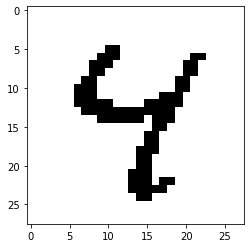

In [245]:
#### convert these to cell to visualize the modified test data x
sample = test_data_x[:,6].reshape((28,28))
plt.imshow(sample, cmap = "Greys")
plt.show()


### Improvement the loading times for the test and training data set


In [236]:

#writing the data
with open("mnist_data.pkl", "bw") as md:
    data = {}
    data["train_data_x"] = train_data_x
    data["train_data_y"] = train_data_y
    data["test_data_x"] = test_data_x
    data["test_data_y"] = test_data_y
    pickle.dump(data, md)


In [237]:
#loading of the data
with open("mnist_data.pkl", "br") as md:
    data = pickle.load(md)

train_data_x = data["train_data_x"] 
train_data_y = data["train_data_y"]
test_data_x = data["test_data_x"]
test_data_y = data["test_data_y"]

### Creating and training of the neural network  proper

In [238]:
#Creating the neural network

#Input layer : 784 inputs
#Output layer: 10 neurons
#Hidden Layer: 5 layers
#first hidden layer: 392 neurons
#second hidden layer: 196 neurons
#third hidden layer: 98 neurons
#fourth hidden layer: 49 neurons
#fifth hidden layer: 24 neurons

ann = nns.NeuralNetwork([784,392,196,98,49,24,10])

#training proper with learning rate of 0.8 and epochs of 1000
#one hour and fifteen minutes hindi pa tapos hahaha

ann.train(train_data_x,train_data_y,learning_rate=0.3, epochs=20)

In [239]:
#saving of the model
ann.save_model()

In [240]:
y_pred = ann.predict(test_data_x)

mse = np.sum((test_data_y - y_pred) ** 2) / (2 * test_data_y.shape[1])

In [241]:
print(mse)

0.8119124192751354


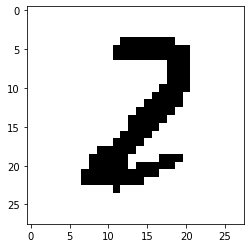

[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
this number is 1


In [247]:

index = 1002
img = test_data_x[:,index]

sample = img.reshape((28,28))
plt.imshow(sample, cmap = "Greys")
plt.show()

print(test_data_y[:,index])
print(f"this number is {np.argmax(test_data_y[:,index])}")

In [243]:
test = np.array([img])
test = test.T
y_pred = ann.predict(test)
print(y_pred)
print(np.argmax(y_pred) + 1)

[[0.09365084]
 [0.03747368]
 [0.06220412]
 [0.99991019]
 [0.03755233]
 [0.14630251]
 [0.14147923]
 [0.01937822]
 [0.09815388]
 [0.09924714]]
4


[0 1 2 3 4 5 6 7 8 9]
